# Part I - PISA 2012
## by Aldair Mendoza

## Introduction

PISA 2012 is an study developed by the OECD, the data contains the skills of 15-year-old school students around the world. The study mainly assesses students’ mathematics, science, and reading skills. The data also contains information on students’ background and their schools.This dataset, PISA 2012, has relevant data on 485,490 students around the world.

The main purpose of this project is to communicate the finding about the data exploratory analysis, using Python data science and data visualization libraries to explore the PISA 2012 dataset variables.

## Preliminary Wrangling

In [1]:
# Importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pisa = pd.read_csv('pisa2012.csv', encoding='latin-1', index_col=0,
       dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str},     
    iterator=True, chunksize=50000
)

In [3]:
df_list = []

for df in pisa:
    df = df.rename(columns={
                'CNT': 'country',
                'STIDSTD': 'student_id',
                'ST01Q01': 'international_grade',
                'ST03Q02': 'birthyear',
                'ST04Q01': 'gender',
                'WEALTH': 'wealth',
                'ST11Q01': 'mother_present',
                'ST11Q02': 'father_present',
                'ST57Q05': 'study_with_parent',
                'HEDRES': 'educational_resources',
                'ESCS': 'socio_economic_status',
                'HISCED': 'highest_education_parents',
                'HISEI': 'highest_parental_status',
                'PERSEV': 'perseverance',
                'OPENPS': 'problem_solving',
                'TEACHSUP': 'teacher_support',
                'ICTATTPOS': 'computer_tool_school',
                'INTMAT': 'math_interest',
                'ANXMAT': 'math_anxiety',
                'ST49Q07': 'computer_programming',
                'PV1MATH': 'math_score1',
                'PV2MATH': 'math_score2',
                'PV3MATH': 'math_score3',
                'PV4MATH': 'math_score4',
                'PV5MATH': 'math_score5',
                'PV1READ': 'reading_score1',
                'PV2READ': 'reading_score2',
                'PV3READ': 'reading_score3',
                'PV4READ': 'reading_score4',
                'PV5READ': 'reading_score5',
                'PV1SCIE': 'science_score1',
                'PV2SCIE': 'science_score2',
                'PV3SCIE': 'science_score3',
                'PV4SCIE': 'science_score4',
                'PV5SCIE': 'science_score5'
              })
    
    students_performance = df[['country', 
                              'student_id', 
                              'international_grade', 
                              'birthyear',
                              'gender', 
                              'wealth', 
                              'mother_present', 
                              'father_present', 
                              'study_with_parent',
                              'educational_resources', 
                              'socio_economic_status', 
                              'highest_education_parents',
                              'highest_parental_status',
                              'perseverance', 
                              'problem_solving', 
                              'teacher_support', 
                              'computer_tool_school', 
                              'math_interest', 
                              'math_anxiety', 
                              'computer_programming',
                              'math_score1',
                              'math_score2',
                              'math_score3',
                              'math_score4',
                              'math_score5',
                              'reading_score1',
                              'reading_score2',
                              'reading_score3',
                              'reading_score4',
                              'reading_score5',
                              'science_score1',
                              'science_score2',
                              'science_score3',
                              'science_score4',
                              'science_score5']]
    
    df_list.append(students_performance)
    
students_performance = pd.concat(df_list)

In [4]:
students_performance_cleaned = students_performance.copy()

In [5]:
# Calculating the math, reading, and science scores.
students_performance_cleaned['math_score'] = students_performance_cleaned[['math_score1', 'math_score2', 'math_score3', 'math_score4', 'math_score5']].mean(axis=1)
students_performance_cleaned['reading_score'] = students_performance_cleaned[['reading_score1', 'reading_score2', 'reading_score3', 'reading_score4', 'reading_score5']].mean(axis=1)
students_performance_cleaned['science_score'] = students_performance_cleaned[['science_score1', 'science_score2', 'science_score3', 'science_score4', 'science_score5']].mean(axis=1)

In [6]:
# Dropping columns
students_performance_cleaned = students_performance_cleaned.drop(students_performance_cleaned.loc[:, 'math_score1':'science_score5'].columns, axis = 1)

In [7]:
# Calculating the overall_score column
students_performance_cleaned['overall_score'] = (students_performance_cleaned['math_score'] + students_performance_cleaned['reading_score'] + students_performance_cleaned['science_score']) / 3

In [8]:
# Categorizing both parents present or single parenthood 
students_performance_cleaned['parents_present'] = ((students_performance_cleaned['mother_present'] == 'No') | (students_performance_cleaned['father_present'] == 'No')).replace(False, 'Both Parents').replace(True, 'Single Parent')

In [9]:
# Filling na values with the mean of column. Only for columns that do not have a lot of null values.
students_performance_cleaned['wealth'].fillna(students_performance_cleaned['wealth'].mean(), inplace=True)
students_performance_cleaned['educational_resources'].fillna(students_performance_cleaned['educational_resources'].mean(), inplace=True)
students_performance_cleaned['socio_economic_status'].fillna(students_performance_cleaned['socio_economic_status'].mean(), inplace=True)

In [10]:
students_performance_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    485490 non-null  object 
 1   student_id                 485490 non-null  int64  
 2   international_grade        485490 non-null  int64  
 3   birthyear                  485490 non-null  int64  
 4   gender                     485490 non-null  object 
 5   wealth                     485490 non-null  float64
 6   mother_present             460559 non-null  object 
 7   father_present             441036 non-null  object 
 8   study_with_parent          289502 non-null  float64
 9   educational_resources      485490 non-null  float64
 10  socio_economic_status      485490 non-null  float64
 11  highest_education_parents  473091 non-null  object 
 12  highest_parental_status    450621 non-null  float64
 13  perseverance               31

In [11]:
students_performance_cleaned.to_csv('PISA_2012_cleaned.csv')

### What is the structure of your dataset?

> The dataset is distributed by are 21 variables which were extracted from the PISA 2012 data in order to find the impact of this variables on the student score. The total student observations in the dataset are 485490.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are student score performance on math, reading, and science. Essentially finding what variables affect the overall score of students and their performance at school.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In order to find what features have an impact in student performance at school, the 13 features are: wealth, mother_present, father_present, study_with_parent, educational_resources, socio_economic_status,highest_education_parents, highest_parental_status, perseverance, problem_solving, teacher_support, computer_tool_school, math_interest, math_anxiety, and computer_programming.

## Univariate Exploration

### 1: What is the gender distribution?

Female    245064
Male      240426
Name: gender, dtype: int64


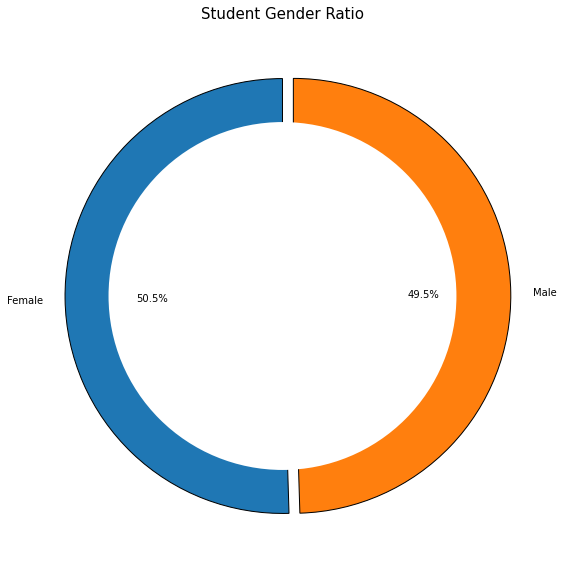

In [12]:
slices = students_performance_cleaned['gender'].value_counts()
print(slices)
plt.figure(figsize = [15,10])
labels = ["Female", "Male"]
explode = [0, 0.05]
plt.pie(slices, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title("Student Gender Ratio", size=15)
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

> The gender ratio is almost equally distributed. It means that there are no gender bias.

### 2: What is the distribution of parenthood?

Both Parents     407696
Single Parent     77794
Name: parents_present, dtype: int64


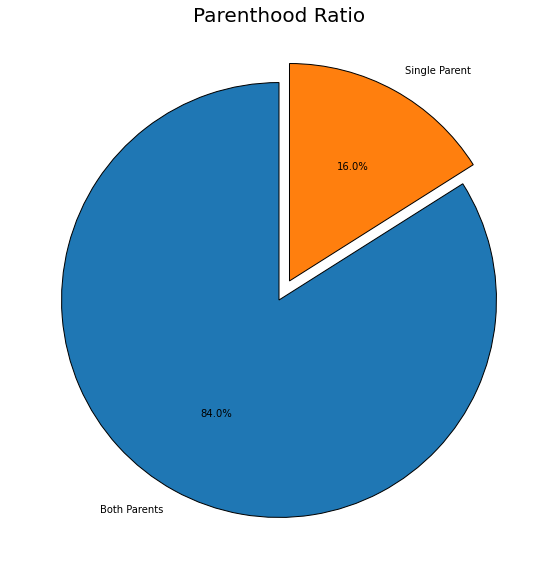

In [13]:
slices = students_performance_cleaned['parents_present'].value_counts()
print(slices)
plt.figure(figsize = [15,10])
labels = ["Both Parents", "Single Parent"]
explode = [0, 0.1]
plt.pie(slices, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title("Parenthood Ratio", size=20)
plt.show()

### 4: How is distributed the scores?

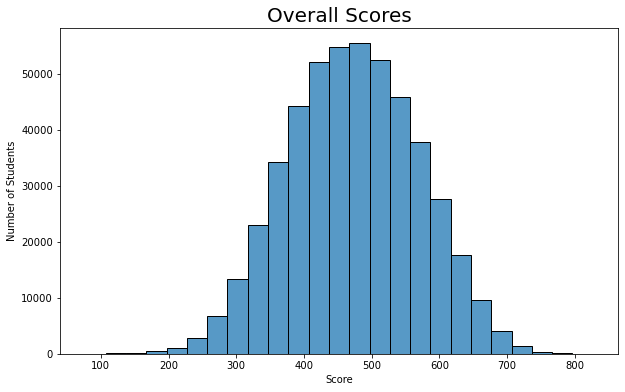

In [14]:
bins = 25
plt.figure(figsize = [10,6])
sns.histplot(students_performance_cleaned['overall_score'], bins = bins)
plt.title('Overall Scores', size = 20)
plt.xlabel('Score')
plt.ylabel('Number of Students');

> Overall Scores have a normal distribution.

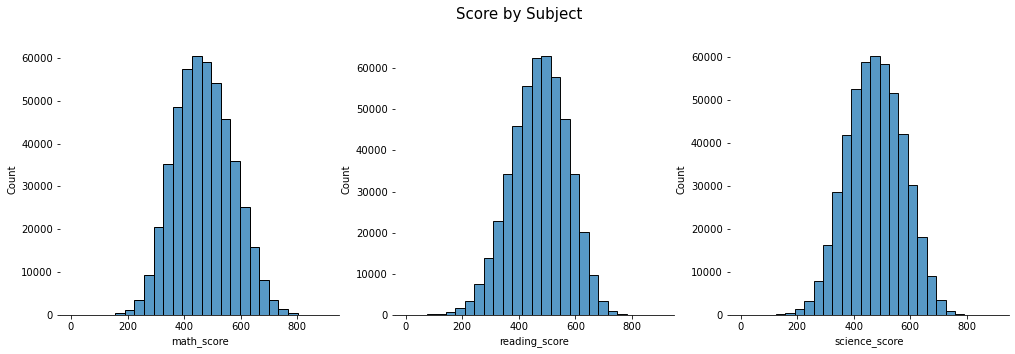

In [15]:
f, axes = plt.subplots(1, 3, figsize = (17, 5), sharex = True)
sns.despine(left = True)
sns.histplot(students_performance_cleaned['math_score'], ax = axes[0], bins = bins)
sns.histplot(students_performance_cleaned['reading_score'], ax = axes[1], bins = bins)
sns.histplot(students_performance_cleaned['science_score'], ax = axes[2], bins = bins)
plt.suptitle('Score by Subject', size=15)
plt.show();

> All score subject are distributed normally where the mean is almost 480 points. 

### 5: What is the distribution of the factors of student performance?

array([[<AxesSubplot:title={'center':'wealth'}>,
        <AxesSubplot:title={'center':'educational_resources'}>,
        <AxesSubplot:title={'center':'socio_economic_status'}>],
       [<AxesSubplot:title={'center':'highest_parental_status'}>,
        <AxesSubplot:title={'center':'perseverance'}>,
        <AxesSubplot:title={'center':'problem_solving'}>],
       [<AxesSubplot:title={'center':'teacher_support'}>,
        <AxesSubplot:title={'center':'computer_tool_school'}>,
        <AxesSubplot:title={'center':'math_interest'}>],
       [<AxesSubplot:title={'center':'math_anxiety'}>,
        <AxesSubplot:title={'center':'study_with_parent'}>,
        <AxesSubplot:>]], dtype=object)

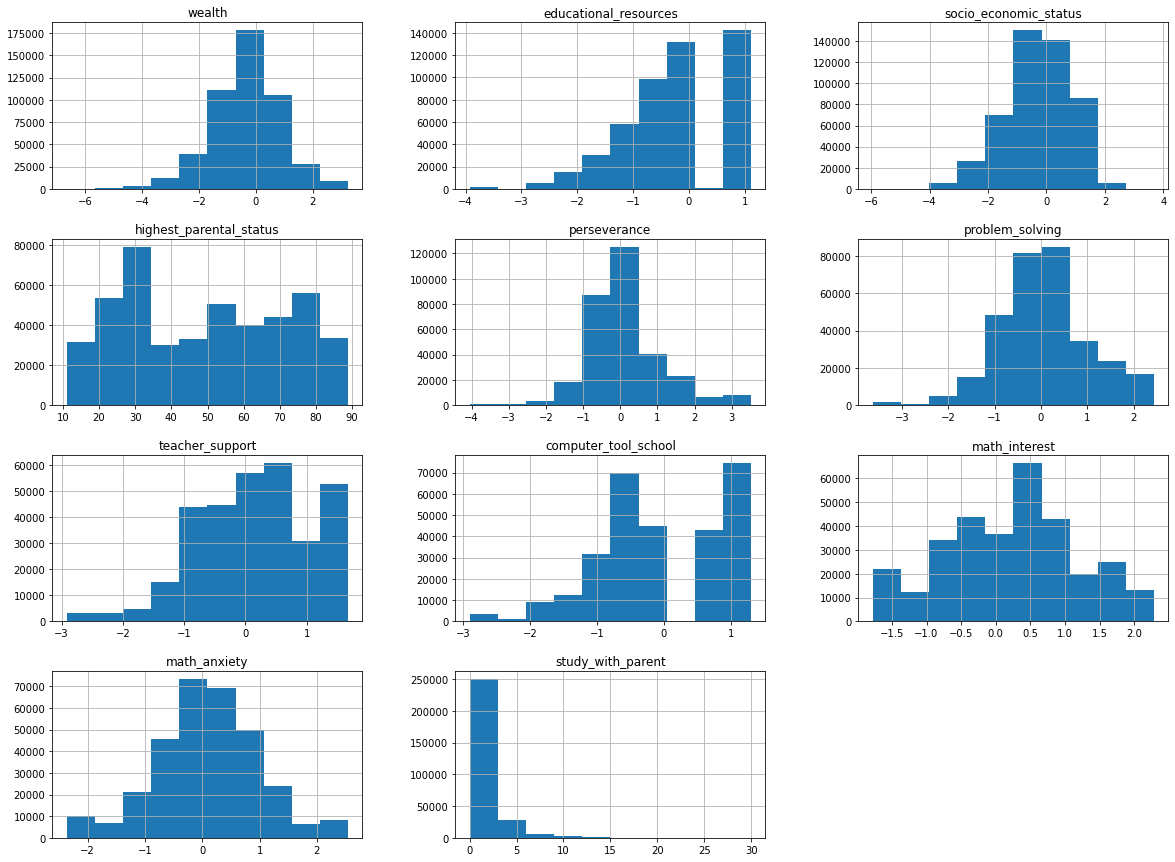

In [16]:
factors = ['wealth', 'educational_resources','socio_economic_status', 'highest_parental_status', 'perseverance', 'problem_solving', 'teacher_support', 'computer_tool_school', 'math_interest', 'math_anxiety', 'study_with_parent']
students_performance_cleaned.hist(factors, figsize=[20, 15])

> The wealth, problem_solving, and math_anxiety factors seems to have a pretty normal distribution.

> The factors of educational_resources, socio_economic_status, teacher_support seem to be skewed to the left.

> There a clear mode in study_with_parent.

> computer_tool_school and educational_resources have a bimodal distribution.

### 6: What are the countries with most students?

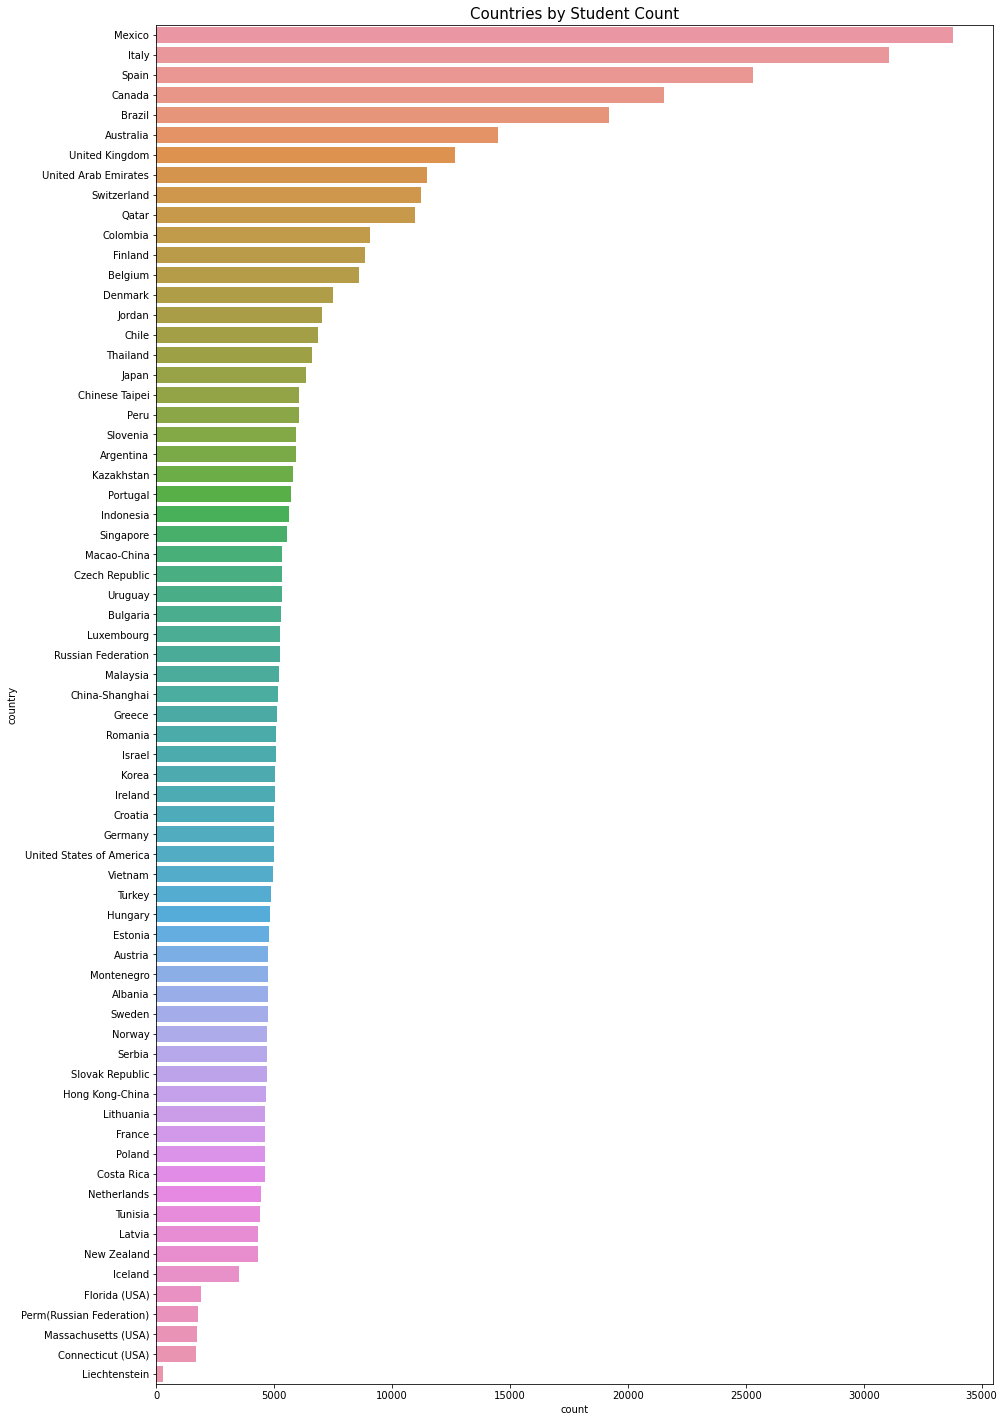

In [17]:
countries = students_performance_cleaned['country'].value_counts().index
plt.figure(figsize=[15,25])
sns.countplot(y = 'country', order = countries, data=students_performance_cleaned)
plt.title('Countries by Student Count',size=15);

> We can see the the top five countries with most students who participated in the study are Mexico, Italy, Spain, Canada and Brazil.

### 7: What about computer programming interest?

In [18]:
students_performance_cleaned.computer_programming.value_counts()

Never or rarely            185257
Sometimes                   68441
Often                       37373
Always or almost always     21354
Name: computer_programming, dtype: int64

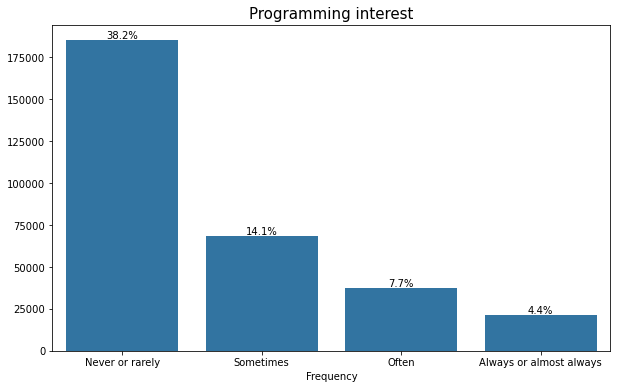

In [19]:
plt.figure(figsize=[10, 6]);
sns.countplot(x = 'computer_programming', data = students_performance_cleaned, color = sns.color_palette()[0]);

n_points = students_performance_cleaned.shape[0]
cat_counts = students_performance_cleaned['computer_programming'].value_counts()
locs, labels = plt.xticks() # ticks

# loop through each pair of locations and labels for text property in order to get the label percentages
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', va='bottom', color = 'black')

plt.ylabel('');
plt.xlabel('Frequency');
plt.title('Programming interest', size=15);

> 4.4% students are have an strong interest in computer programming.

### 8: How is distributed the highest parent education level?

In [20]:
# Ordering the parent education levels 
parent_education_dtype = pd.api.types.CategoricalDtype(categories=['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6'], ordered=True)
students_performance_cleaned.loc[:,'highest_education_parents'] = students_performance_cleaned['highest_education_parents'].astype(parent_education_dtype)

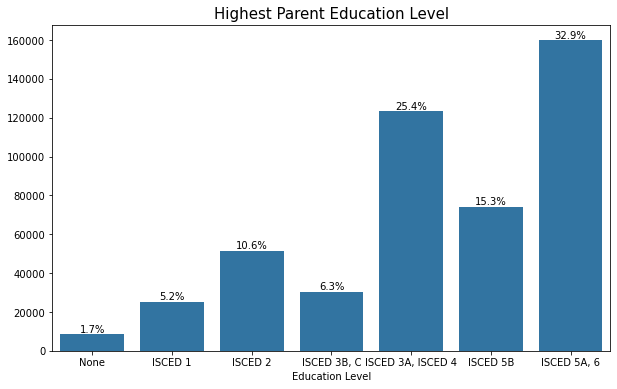

In [21]:
plt.figure(figsize=[10, 6]);
sns.countplot(x = 'highest_education_parents', data = students_performance_cleaned, color = sns.color_palette()[0]);

n_points = students_performance_cleaned.shape[0]
cat_counts = students_performance_cleaned['highest_education_parents'].value_counts()
locs, labels = plt.xticks() # ticks

# loop through each pair of locations and labels for text property in order to get the label percentages
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', va='bottom', color = 'black')

plt.ylabel('');
plt.xlabel('Education Level');
plt.title('Highest Parent Education Level', size=15);

## Bivariate Exploration

### 9: Is there a correlation between overall score and factors?

<AxesSubplot:xlabel='socio_economic_status', ylabel='overall_score'>

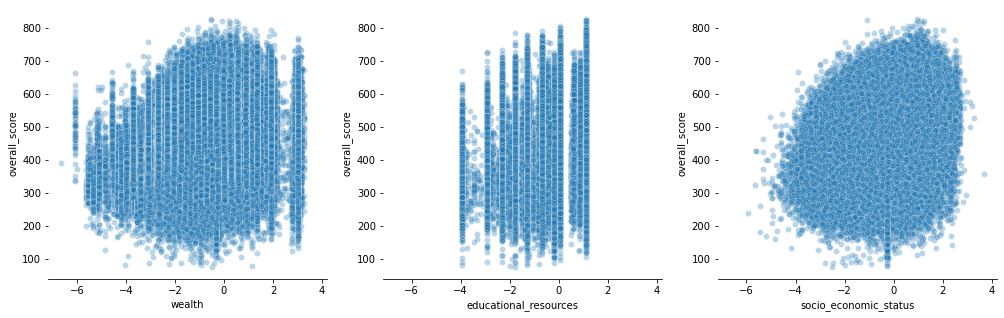

In [22]:
f, axes = plt.subplots(1, 3, figsize = (17, 5), sharex = True)
sns.despine(left = True)
sns.scatterplot(x=students_performance_cleaned['wealth'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[0])
sns.scatterplot(x=students_performance_cleaned['educational_resources'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[1])
sns.scatterplot(x=students_performance_cleaned['socio_economic_status'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[2])

<AxesSubplot:xlabel='teacher_support', ylabel='overall_score'>

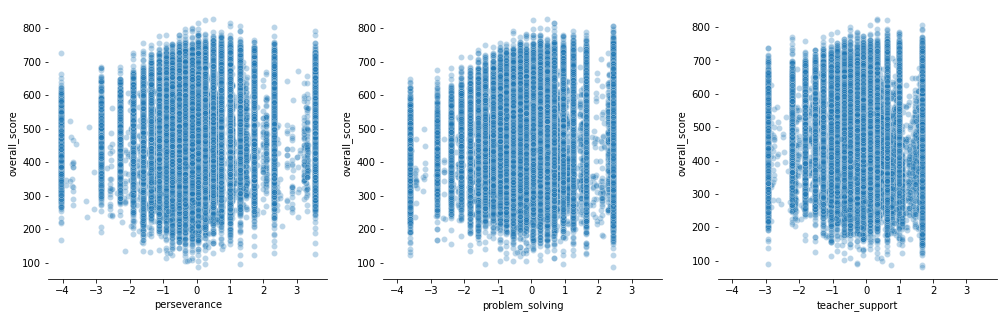

In [23]:
f, axes = plt.subplots(1, 3, figsize = (17, 5), sharex = True)
sns.despine(left = True)
sns.scatterplot(x=students_performance_cleaned['perseverance'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[0])
sns.scatterplot(x=students_performance_cleaned['problem_solving'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[1])
sns.scatterplot(x=students_performance_cleaned['teacher_support'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[2])

<AxesSubplot:xlabel='math_anxiety', ylabel='overall_score'>

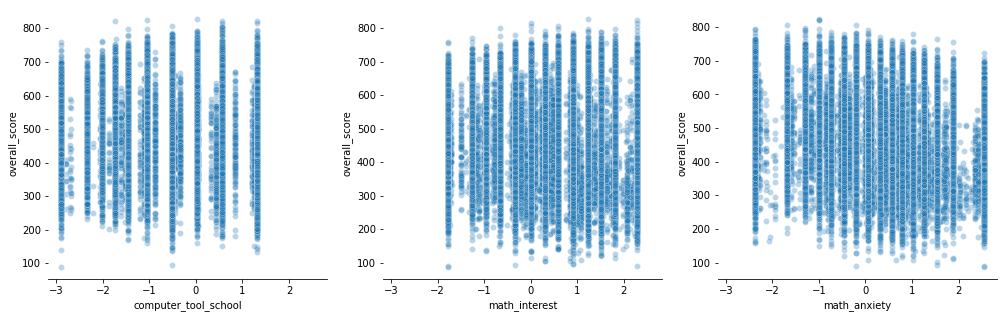

In [24]:
f, axes = plt.subplots(1, 3, figsize = (17, 5), sharex = True)
sns.despine(left = True)
sns.scatterplot(x=students_performance_cleaned['computer_tool_school'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[0])
sns.scatterplot(x=students_performance_cleaned['math_interest'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[1])
sns.scatterplot(x=students_performance_cleaned['math_anxiety'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[2])

In [25]:
students_performance_cleaned['overall_score'].corr(students_performance_cleaned['socio_economic_status'])

0.4094810721675352

> It seems that there are no correlation with these variables. However, there is a weak correlation of 0.4 on socio_economic_status with overall_score.

<AxesSubplot:xlabel='study_with_parent', ylabel='overall_score'>

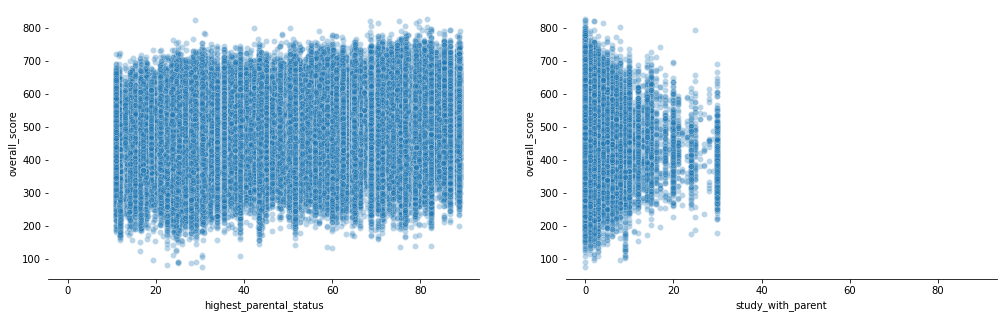

In [26]:
f, axes = plt.subplots(1, 2, figsize = (17, 5), sharex = True)
sns.despine(left = True)
sns.scatterplot(x=students_performance_cleaned['highest_parental_status'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[0])
sns.scatterplot(x=students_performance_cleaned['study_with_parent'],y=students_performance_cleaned['overall_score'],alpha=0.3, ax = axes[1])

> Again, there is no significant correlation with highest_parental_status variable.

### 10: What is the gender ratio by overall score?

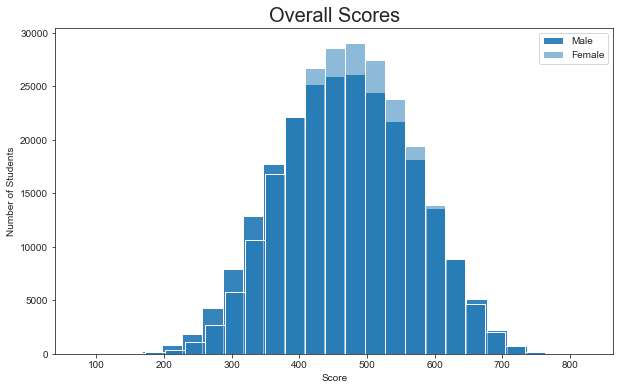

In [27]:
male = students_performance_cleaned[students_performance_cleaned['gender']=='Male']['overall_score']
female = students_performance_cleaned[students_performance_cleaned['gender']=='Female']['overall_score']
sns.set_style("ticks")
bins = 25
plt.figure(figsize = [10,6])
sns.histplot(male, bins = bins, alpha=0.9, label='Male')
sns.histplot(female, bins = bins, alpha=0.5, label='Female')
plt.title('Overall Scores', size = 20)
plt.xlabel('Score')
plt.legend()
plt.ylabel('Number of Students');

> The gender ratio and overall score have a normal distribution.

### 11: What is the mean difference between male and female gender by country? 

In [30]:
female = students_performance_cleaned[students_performance_cleaned['gender']=='Female']
male = students_performance_cleaned[students_performance_cleaned['gender']=='Male']
female_scores = female.groupby('country')[['overall_score']].mean()
male_scores = male.groupby('country')[['overall_score']].mean()
score_diffs = (((male_scores - female_scores)/female_scores)*100).sort_values(by = 'overall_score', ascending = False)
score_diffs

,overall_score
country,
Colombia,2.994126
Chile,1.261221
Liechtenstein,1.238774
Costa Rica,1.214060
Peru,0.887539
...,...
Bulgaria,-6.198057
Thailand,-6.423056
United Arab Emirates,-7.068734


Text(0.5, 1.0, 'Overall Scores Mean Difference Between Male and Female Gender By Country')

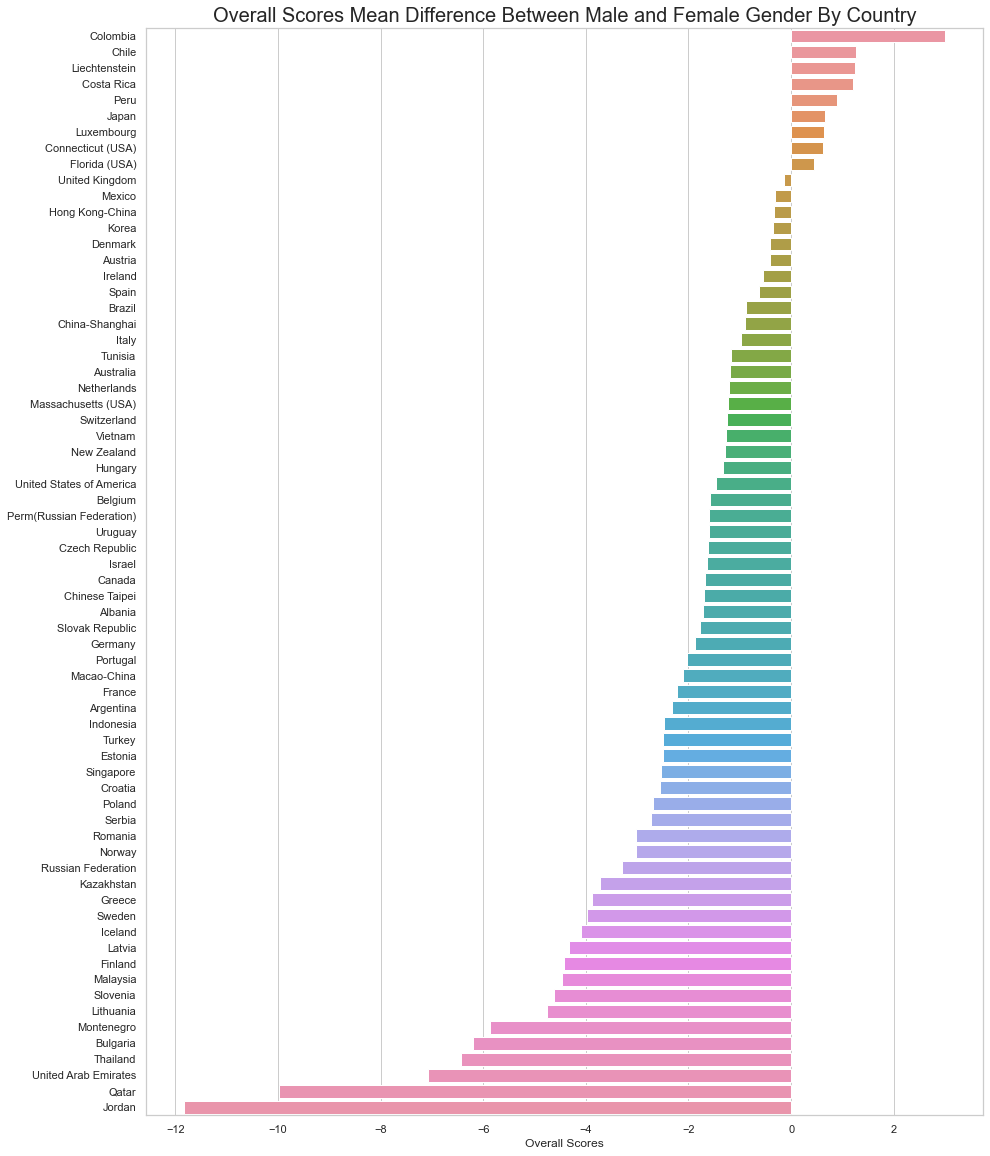

In [31]:
plt.figure(figsize=[15,20])
sns.barplot(x= 'overall_score', y=score_diffs.index, data=score_diffs)
plt.xlabel('Overall Scores')
plt.ylabel('')
plt.title('Overall Scores Mean Difference Between Male and Female Gender By Country', size=20)

> We can see that there is a big difference between the male gender and female gender specially in the countries below.

### 12: What scores have each country in each subject??

In [28]:
country_scores = students_performance_cleaned.groupby(['country'])[['overall_score','math_score','reading_score','science_score']].mean()

Text(0.5, 1.0, 'Countries by Student Score')

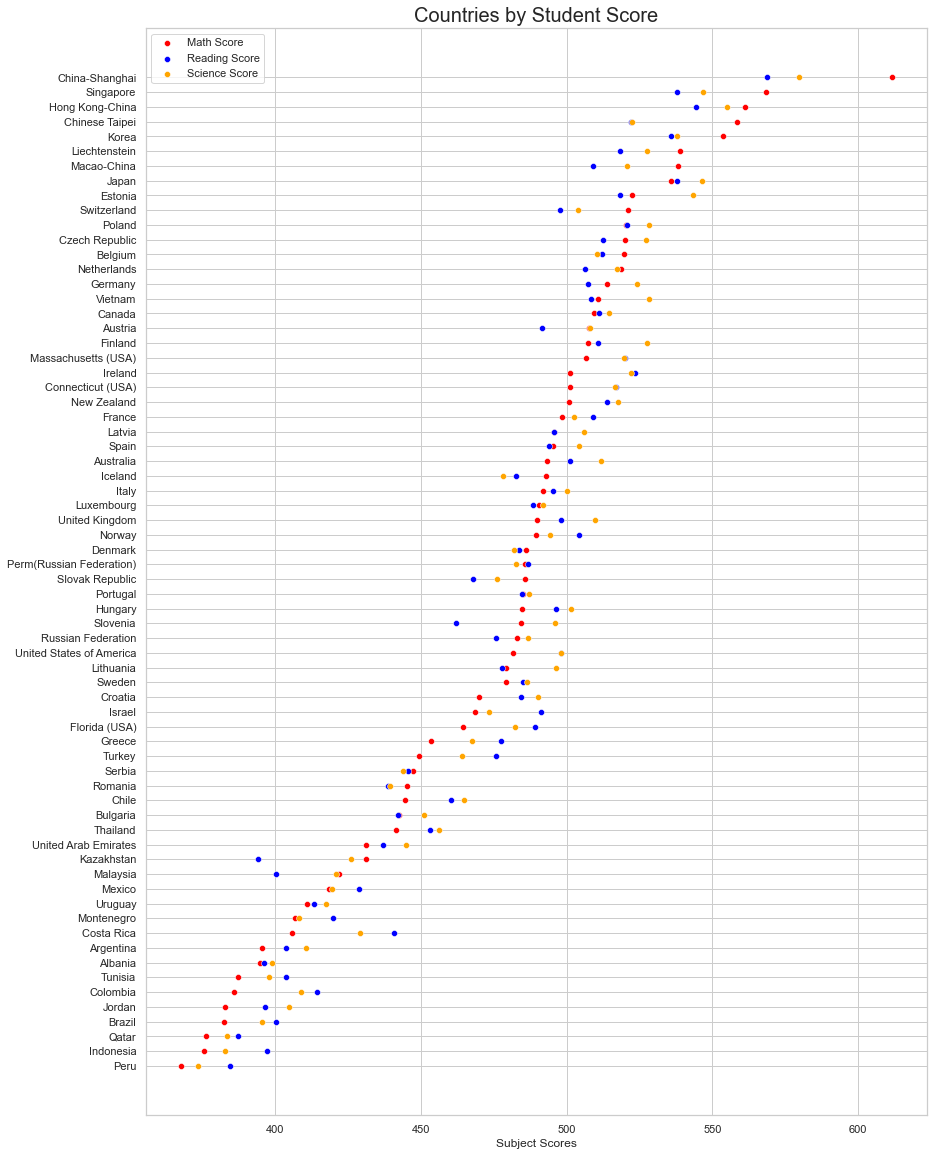

In [29]:
plt.figure(figsize=[14,20])
sns.set(style='whitegrid')
sns.scatterplot(x = 'math_score', y = 'country', data=country_scores.sort_values(by='math_score', ascending=False), color='red', label='Math Score')
sns.scatterplot(x = 'reading_score', y = 'country', data=country_scores.sort_values(by='reading_score', ascending=False), color='blue', label='Reading Score')
sns.scatterplot(x = 'science_score', y = 'country', data=country_scores.sort_values(by='science_score', ascending=False), color='orange', label='Science Score')
plt.legend()
plt.xlabel('Subject Scores')
plt.ylabel('')
plt.title('Countries by Student Score', size=20)


> The top 5 countries with the best score are China-Shanghai, Singapore, Hong Kong-China, Chinese Taipei, and Korea. 

> China-Shanghai has the best score on the three subjects.

### 13: Is there a correlation between factors and overall score?

Text(0.5, 1.0, 'Countries by Student Score')

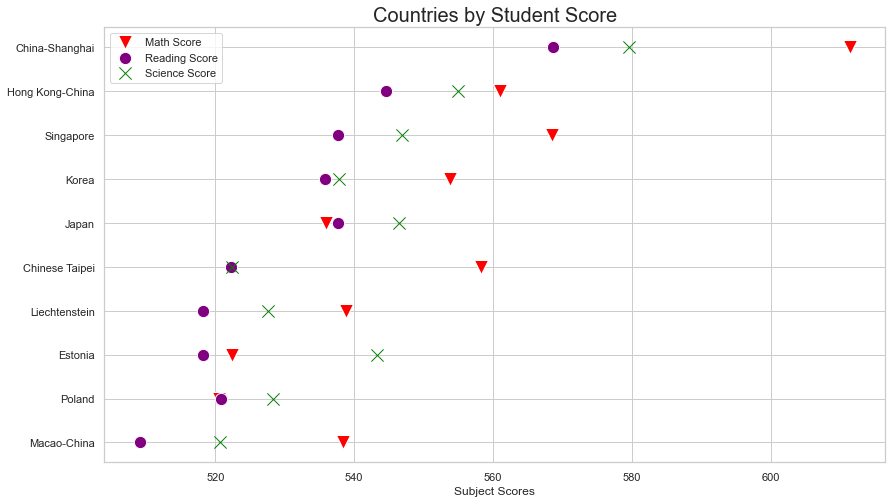

In [40]:
plt.figure(figsize=[14,8])
sns.set(style='whitegrid')
sns.scatterplot(x = 'math_score', y = 'country', data=country_scores.nlargest(10, 'overall_score'), label='Math Score', color = 'red', marker = 'v', s = 200)
sns.scatterplot(x = 'reading_score', y = 'country', data=country_scores.nlargest(10, 'overall_score'), label='Reading Score', color = 'purple', marker = 'o', s = 150)
sns.scatterplot(x = 'science_score', y = 'country', data=country_scores.nlargest(10, 'overall_score'), label='Science Score', color = 'green', marker = 'x', s = 150)
plt.legend()
plt.xlabel('Subject Scores')
plt.ylabel('')
plt.title('Countries by Student Score', size=20)

> The top 10 countries with the best score are China-Shanghai, Singapore, Hong Kong-China, Chinese Taipei, Korea, Japan, Chinese Taipei, Liechtenstein, Estonia, Poland, Macao China. China-Shanghai has the best score on the three subjects.

## Multivariate Exploration


### 14: Is there a correlation between factors and overall score?

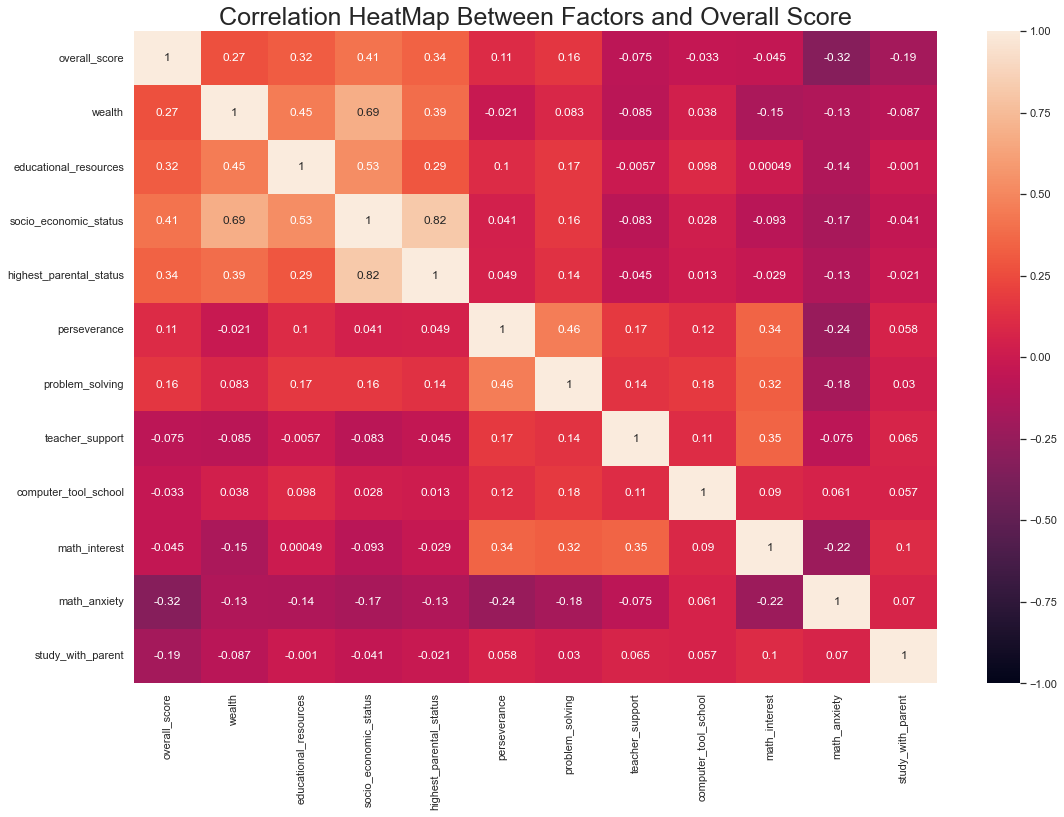

In [32]:
plt.figure(figsize = [18,12])
sns.heatmap(data=students_performance_cleaned[['overall_score','wealth', 'educational_resources','socio_economic_status', 'highest_parental_status', 'perseverance', 'problem_solving', 'teacher_support', 'computer_tool_school', 'math_interest', 'math_anxiety', 'study_with_parent']].corr(),
           center=0, cmap="rocket", annot=True, vmin=-1, vmax=1);
plt.title("Correlation HeatMap Between Factors and Overall Score", size=25);

> We can see that there is a clear correlation on highest_parental_status and socio_economic_status. 

> A positive correlation between socio_economic_status and wealth indicator.

### 15: Is there a correlation between subjects and hours of study?

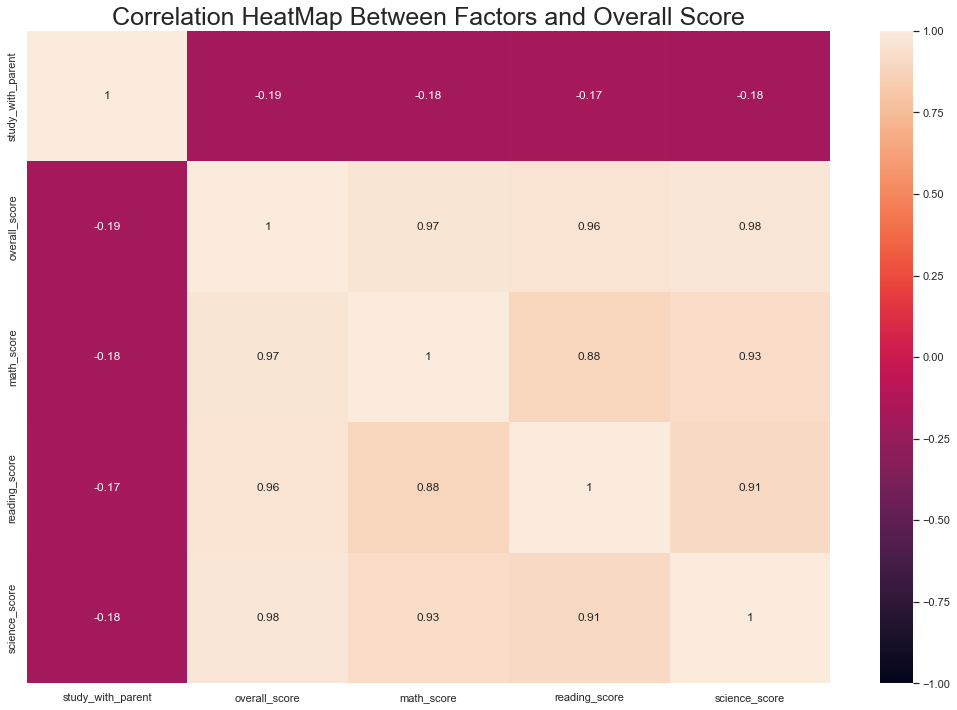

In [33]:
plt.figure(figsize = [18,12])
sns.heatmap(data=students_performance_cleaned[['study_with_parent','overall_score', 'math_score','reading_score', 'science_score']].corr(),
           center=0, cmap="rocket", annot=True, vmin=-1, vmax=1);
plt.title("Correlation HeatMap Between Factors and Overall Score", size=25);

> There is a clear correlation between subject. The is no correlation between hours of study tough.

### 16: Is there an impact between parent education level and subject score?

In [34]:
parent_and_scores = students_performance_cleaned.groupby(['highest_education_parents']).mean().reset_index()[['highest_education_parents','overall_score','math_score','reading_score','science_score']]
parent_and_scores = students_performance_cleaned[['highest_education_parents','overall_score','math_score','reading_score','science_score']]
parent_and_scores.sort_values(by='overall_score')
parent_and_scores = parent_and_scores.copy()
parent_and_scores.rename({'overall_score':'Overall Score', 'math_score':'Math Score', 'reading_score':'Reading Score', 'science_score':'Science Score'},axis=1, inplace=True)

data = pd.melt(parent_and_scores, id_vars=['highest_education_parents'], value_vars=['Overall Score','Math Score','Reading Score','Science Score'])

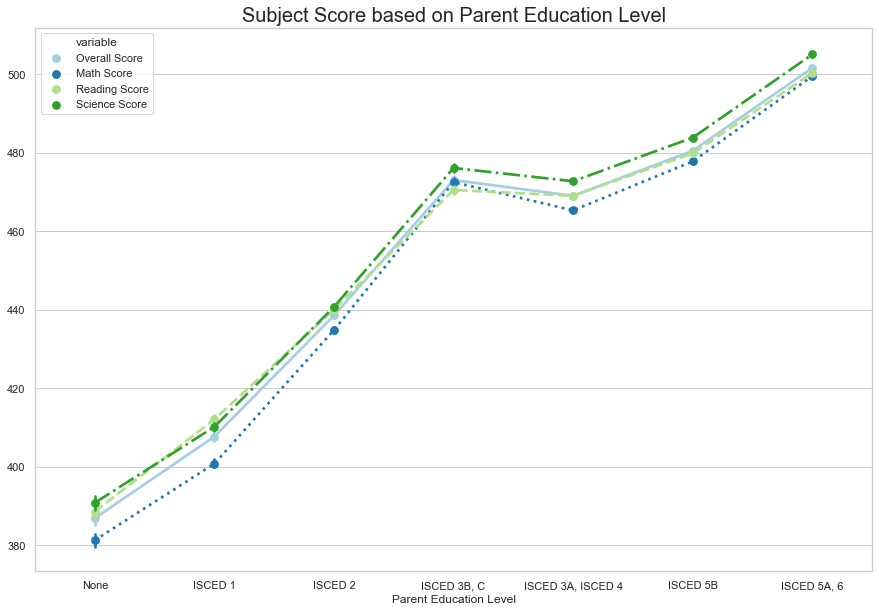

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.pointplot(ax=ax, data = data, x = 'highest_education_parents', y='value', hue='variable', linestyles=["-", ":", "--", "-."], palette=sns.color_palette('Paired'))
plt.xlabel('Parent Education Level')
plt.ylabel('')
plt.title("Subject Score based on Parent Education Level", size=20);

> We can see that ISCED 5A, 6 is the best education parent level. It is clear that the better the parent education level, the better is the score of a student.

### 17: What about parenthood and overall score? Do parenthood type influence on overall score? 

Text(0.5, 1.0, 'Overall Score based on Parent Education Level and Parenthood')

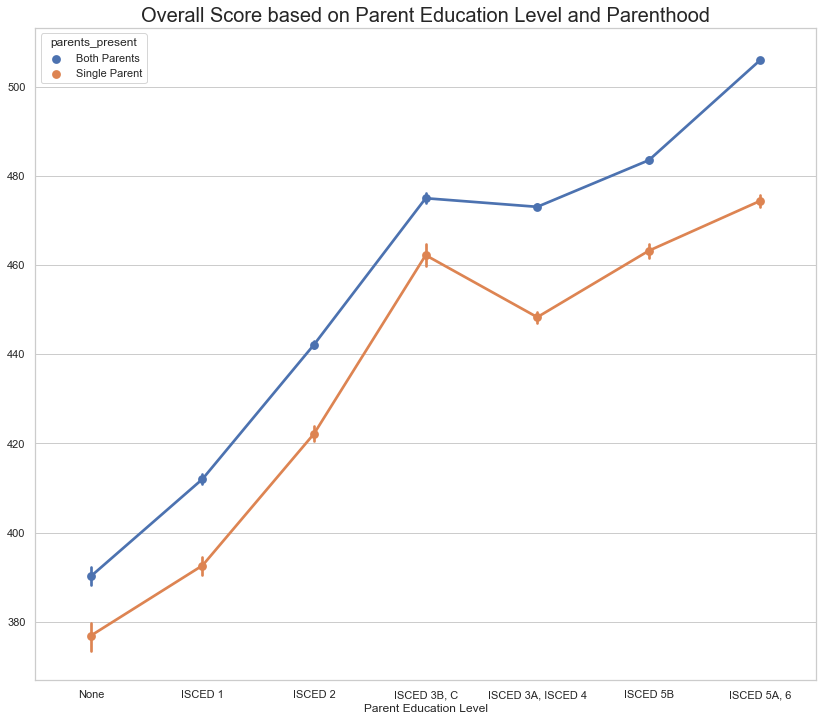

In [36]:
plt.figure(figsize = [14, 12])
sns.pointplot(data = students_performance_cleaned, x = 'highest_education_parents', y='overall_score', hue='parents_present')
plt.xlabel('Parent Education Level')
plt.ylabel('')
plt.title('Overall Score based on Parent Education Level and Parenthood', size=20)

> Seems that there is a huge gap in parenthood type and overall scores. When both parents are present, it is clear that the score is better.

### 18: What about hours of study with parents? Do hours of study have an impact on subject score?

In [37]:
score_study_time = students_performance_cleaned.groupby(['study_with_parent'])[['overall_score','math_score','reading_score','science_score']].mean()

Text(0.5, 1.0, 'Hours of Study with Parent a Week Vs Subject Scores')

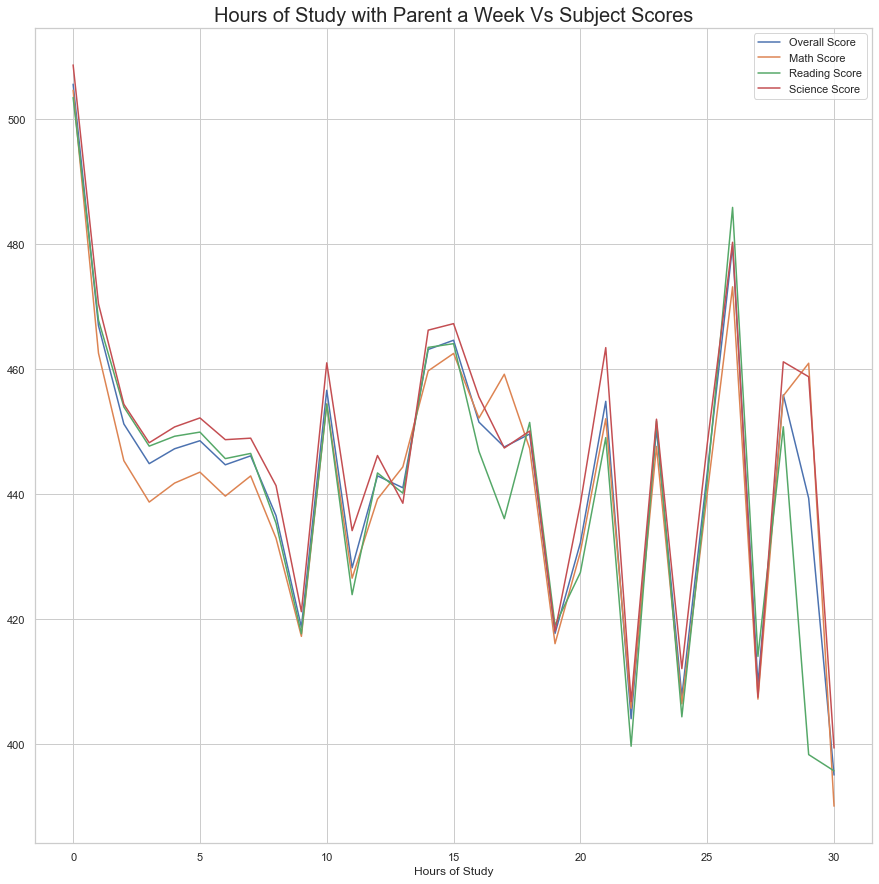

In [38]:
plt.figure(figsize=[15,15])
sns.lineplot(x = score_study_time.index, y = 'overall_score', data=score_study_time, label='Overall Score')
sns.lineplot(x = score_study_time.index, y = 'math_score', data=score_study_time, label='Math Score')
sns.lineplot(x = score_study_time.index, y = 'reading_score', data=score_study_time, label='Reading Score')
sns.lineplot(x = score_study_time.index, y = 'science_score', data=score_study_time, label='Science Score')
plt.xlabel('Hours of Study')
plt.ylabel('')
plt.title('Hours of Study with Parent a Week Vs Subject Scores', size=20)

> It seems that there are no clear evidence that hours of study affect the overall score variable. 

### 19: What about the impact on overall score between hours of study and parenthood type?

Text(0.5, 1.0, 'Overall Score based on Hours of Study and Parenthood')

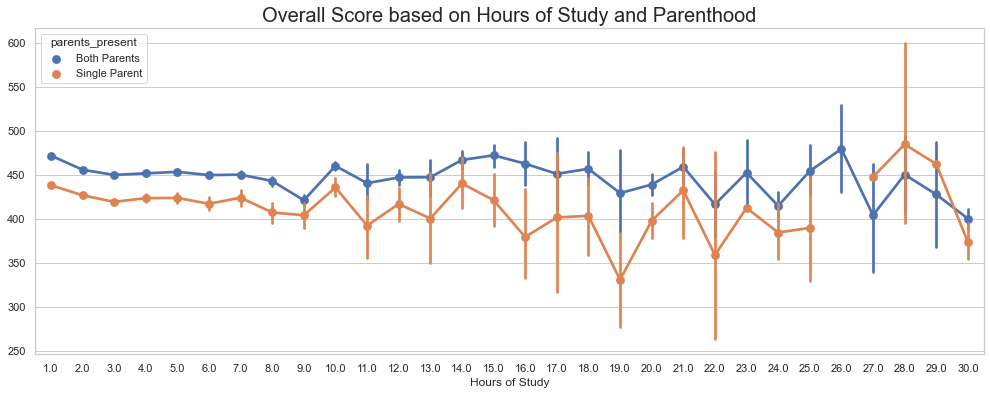

In [39]:
plt.figure(figsize = [17, 6])

sns.pointplot(data = students_performance_cleaned[students_performance_cleaned['study_with_parent'] != 0], x = 'study_with_parent', y = 'overall_score', hue = 'parents_present')
plt.xlabel('Hours of Study')
plt.ylabel('')
plt.title('Overall Score based on Hours of Study and Parenthood', size=20)


> There is no significant correlation between hours of with parents and overall score. Hence, then there is a positive impact on overall score when both parents are present.

## Conclusions

After having explored the PISA 2012 dataset and the factors that we have considered that could have an impact on student scores. The key findings that we found are:

**1. The top five countries with most students who participated in the study are Mexico, Italy, Spain, Canada and Brazil.**

**2. The top 5 countries with the best score are China-Shanghai, Singapore, Hong Kong-China, Chinese Taipei, and Korea. China-Shanghai has the best score on the three subjects. (Math Score, Reading Score, and Science Score)**

**3. There is a strong positive correlation between higest parental status and socio economic status. However, these variables do not have an impact over overall score.**

**4: All math, reading, science subjects have a positive and very strong correlation**

**5: When the parent education level is the highest. It is clear that the better is the score of a student.**

**6: There is a huge gap in parenthood type and overall scores. When both parents are present, it is clear that the score is better rather than single parenthood.**